<a href="https://colab.research.google.com/github/xadd-145/Twitter_Misinformation_Covid/blob/main/MisinformationP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detecting COVID-19 Misinformation on Twitter**



## **Phase 1: Exploratory Data Analysis (EDA)**

### Importing Libraries

In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing,
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    Input, Embedding, LSTM, GRU, SimpleRNN,
    Dense, Dropout, Flatten, BatchNormalization,
    GlobalAveragePooling2D, LeakyReLU
)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
import seaborn as sns

### Mounting Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/Proj-Misinformation/Covid-19 Twitter Dataset (Apr-Jun 2020).csv'

In [ ]:
import pandas as pd
df = pd.read_csv(data_path)
df.head()

,id,created_at,source,original_text,lang,favorite_count,retweet_count,original_author,hashtags,user_mentions,place,clean_tweet,compound,neg,neu,pos,sentiment
0,1.250000e+18,4/19/2020,"<a href=""http://twitter.com/download/android"" ...",RT @GlblCtzn: .@priyankachopra is calling on l...,en,0.0,31.0,RJIshak,NaN,"GlblCtzn, priyankachopra",Jakarta Capital Region,call leader help protect refuge covid19 provid...,0.8176,0.0,0.452,0.548,pos
1,1.250000e+18,4/19/2020,"<a href=""http://twitter.com/download/android"" ...",RT @OGSG_Official: OGUN STATE SUPPORT FOR CBN-...,en,0.0,61.0,makinwaoluwole,NaN,OGSG_Official,Nigeria,ogun state support cbn nirsal covid19 target c...,0.6486,0.0,0.602,0.398,pos
2,1.250000e+18,4/19/2020,"<a href=""http://twitter.com/download/iphone"" r...",RT @AdvoBarryRoux: These 5 police officials ba...,en,0.0,1.0,TembeAmu,NaN,AdvoBarryRoux,NaN,polic offici base namahadi polic station busi ...,0.2732,0.0,0.851,0.149,pos
3,1.250000e+18,4/19/2020,"<a href=""http://twitter.com/download/iphone"" r...",RT @MobilePunch: COVID-19: Oyo discharges two ...,en,0.0,0.0,ilyasrabiu,NaN,MobilePunch,"Lagos, Nigeria",covid19 oyo discharg two patient,0.0000,0.0,1.000,0.000,neu
4,1.250000e+18,4/19/2020,"<a href=""http://twitter.com/download/android"" ...",My Condolences to the Family of those who did ...,en,0.0,13869.0,bucketeconomist,Covid_19,NaN,NaN,condol famili surviv,0.0000,0.0,1.000,0.000,neu


### Understanding Data & Cleaning Data

In [29]:
df.shape

(143901, 17)

In [30]:
df.columns

Index(['id', 'created_at', 'source', 'original_text', 'lang', 'favorite_count',
       'retweet_count', 'original_author', 'hashtags', 'user_mentions',
       'place', 'clean_tweet', 'compound', 'neg', 'neu', 'pos', 'sentiment'],
      dtype='object')

In [ ]:
# View column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143903 entries, 0 to 143902
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               143901 non-null  float64
 1   created_at       143902 non-null  object 
 2   source           143876 non-null  object 
 3   original_text    143902 non-null  object 
 4   lang             143902 non-null  object 
 5   favorite_count   143902 non-null  float64
 6   retweet_count    143902 non-null  float64
 7   original_author  143902 non-null  object 
 8   hashtags         28510 non-null   object 
 9   user_mentions    107332 non-null  object 
 10  place            105021 non-null  object 
 11  clean_tweet      143419 non-null  object 
 12  compound         143903 non-null  float64
 13  neg              143903 non-null  float64
 14  neu              143903 non-null  float64
 15  pos              143903 non-null  float64
 16  sentiment        143903 non-null  obje

In [ ]:
# Get summary statistics
df.describe(include='all')

,id,created_at,source,original_text,lang,favorite_count,retweet_count,original_author,hashtags,user_mentions,place,clean_tweet,compound,neg,neu,pos,sentiment
count,1.439010e+05,143902,143876,143902,143902,143902.000000,143902.000000,143902,28510,107332,105021,143419,143903.000000,143903.000000,143903.000000,143903.000000,143903
unique,NaN,57,1522,143902,1,NaN,NaN,126159,15786,68216,35495,137698,NaN,NaN,NaN,NaN,3
top,NaN,5/4/2020,"<a href=""http://twitter.com/download/android"" ...","RT @DocJeffD: Friends, this story misses the m...",en,NaN,NaN,sumanebot,COVID19,realDonaldTrump,United States,covid19,NaN,NaN,NaN,NaN,neu
freq,NaN,7165,43906,1,143902,NaN,NaN,40,2746,519,1777,260,NaN,NaN,NaN,NaN,57586
mean,1.260088e+18,NaN,NaN,NaN,NaN,0.191151,1925.238273,NaN,NaN,NaN,NaN,NaN,0.004537,0.097123,0.797310,0.105569,NaN
std,5.401576e+15,NaN,NaN,NaN,NaN,4.713526,10168.291564,NaN,NaN,NaN,NaN,NaN,0.382305,0.157005,0.201068,0.155915,NaN
min,1.250000e+18,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-0.990100,0.000000,0.000000,0.000000,NaN
25%,1.260000e+18,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,-0.177900,0.000000,0.652000,0.000000,NaN
50%,1.260000e+18,NaN,NaN,NaN,NaN,0.000000,17.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.804000,0.000000,NaN
75%,1.260000e+18,NaN,NaN,NaN,NaN,0.000000,296.000000,NaN,NaN,NaN,NaN,NaN,0.273200,0.193000,1.000000,0.206000,NaN


In [31]:
# All tweets came only from April, May and June months of 2020.
df.created_at.value_counts()

,count
created_at,
5/4/2020,7165
4/25/2020,6178
5/9/2020,5857
5/23/2020,5600
4/24/2020,5323
5/22/2020,5102
5/5/2020,4949
5/25/2020,4804
5/6/2020,4575


In [32]:
# There are 35495 unique locations from where the tweets came.
df['place'].value_counts()

,count
place,
Unknown,38886
United States,1777
India,1149
Nigeria,1053
London,1031
...,...
the TARDIS,1
England UK,1
"Durban, South Africa",1


In [33]:
# There are 3 unique sentiment types in our dataset
df['sentiment'].value_counts()

,count
sentiment,
neu,57584
pos,46125
neg,40192


In [ ]:
# Check for missing values
df.isnull().sum()

,0
id,2
created_at,1
source,27
original_text,1
lang,1
favorite_count,1
retweet_count,1
original_author,1
hashtags,115393
user_mentions,36571


In [17]:
#filling non-critical values to unknown
# Fill metadata columns
df['source'] = df['source'].fillna('Unknown')
df['favorite_count'] = df['favorite_count'].fillna(0)
df['retweet_count'] = df['retweet_count'].fillna(0)
df['original_author'] = df['original_author'].fillna('Unknown')

# Fill optional metadata
df['hashtags'] = df['hashtags'].fillna('None')
df['user_mentions'] = df['user_mentions'].fillna('None')
df['place'] = df['place'].fillna('Unknown')

# Recheck missing values
df.isnull().sum()

,0
id,0
created_at,0
source,0
original_text,0
lang,0
favorite_count,0
retweet_count,0
original_author,0
hashtags,0
user_mentions,0


### EDA Visuals

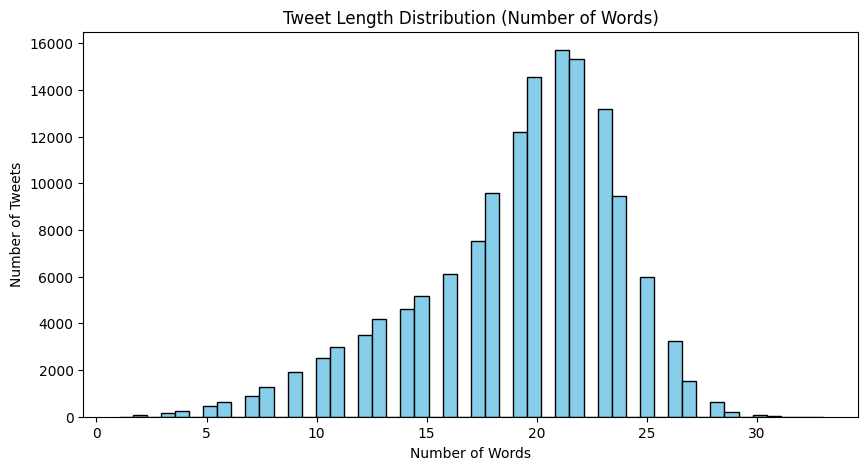

In [34]:
#Tweet Length Distribution (Number of Words per Tweet)
df['tweet_length'] = df['original_text'].apply(lambda x: len(str(x).split()))

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(df['tweet_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Tweet Length Distribution (Number of Words)')
plt.xlabel('Number of Words')
plt.ylabel('Number of Tweets')
plt.show()


<ipython-input-49-7aadcb1f73f4>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Hashtag', data=top_hashtags, palette='viridis')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


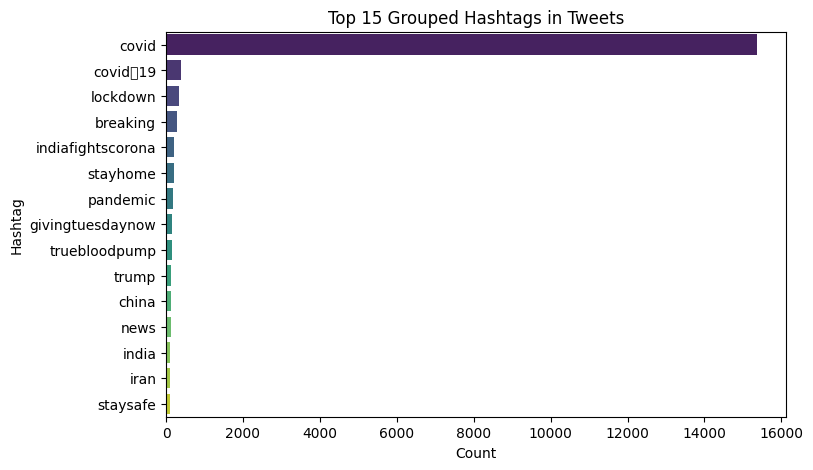

In [49]:
import re
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

def extract_and_group_hashtags(text):
    hashtags = re.findall(r"#(\w+)", str(text))
    hashtags = [tag.lower().replace('_', '') for tag in hashtags]
    grouped_tags = []
    for tag in hashtags:
        if tag in ['covid19', 'covid19', 'covid', 'coronavirus', 'corona', 'covid 19']:
            grouped_tags.append('covid')
        else:
            grouped_tags.append(tag)
    return grouped_tags

df['hashtags_extracted'] = df['original_text'].apply(extract_and_group_hashtags)
all_hashtags = [tag for tags in df['hashtags_extracted'] for tag in tags]
hashtag_freq = Counter(all_hashtags)
top_hashtags = pd.DataFrame(hashtag_freq.most_common(15), columns=['Hashtag', 'Count'])

# Re-plot with grouped hashtags
plt.figure(figsize=(8,5))
sns.barplot(x='Count', y='Hashtag', data=top_hashtags, palette='viridis')
plt.title('Top 15 Grouped Hashtags in Tweets')
plt.xlabel('Count')
plt.ylabel('Hashtag')
plt.show()


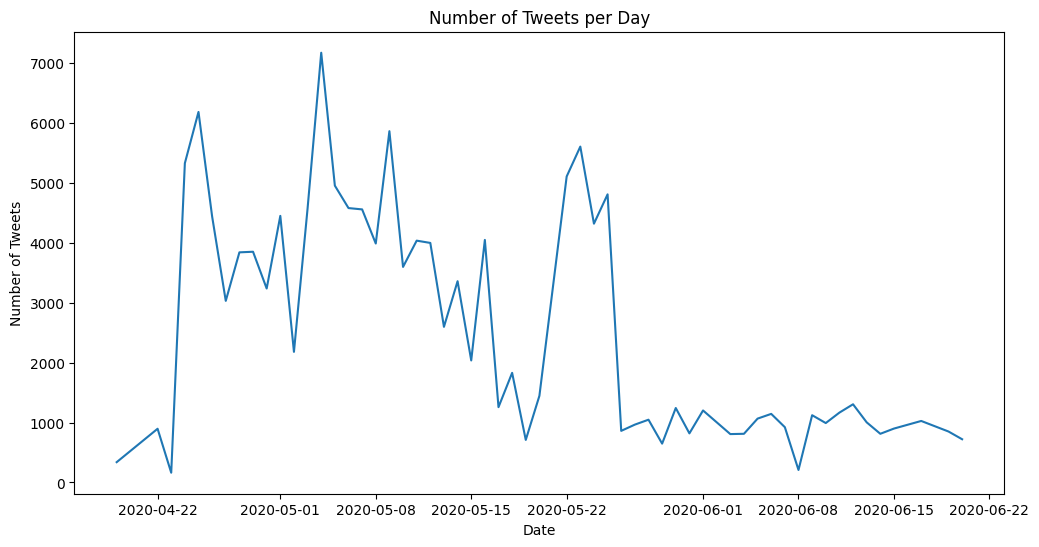

In [36]:
#Tweet Volume Over Time (Number of Tweets per Day)
df['created_at'] = pd.to_datetime(df['created_at'])
df['date'] = df['created_at'].dt.date

tweets_per_day = df.groupby('date').size()

plt.figure(figsize=(12,6))
tweets_per_day.plot()
plt.title('Number of Tweets per Day')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()


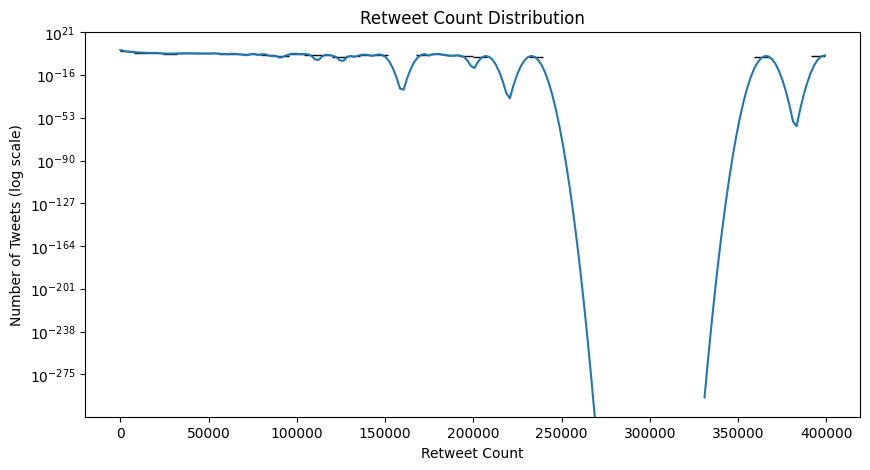

In [37]:
#Retweet Count Distribution (How Many Times Tweets Were Shared)
plt.figure(figsize=(10,5))
sns.histplot(df['retweet_count'], bins=50, kde=True, log_scale=(False, True))  # log-scale Y-axis to handle skewness
plt.title('Retweet Count Distribution')
plt.xlabel('Retweet Count')
plt.ylabel('Number of Tweets (log scale)')
plt.show()

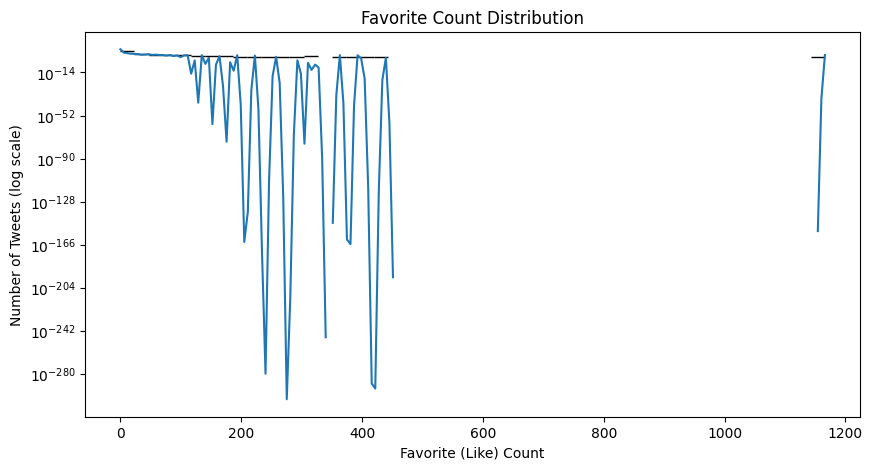

In [38]:
#Favorite (Like) Count Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['favorite_count'], bins=50, kde=True, log_scale=(False, True))
plt.title('Favorite Count Distribution')
plt.xlabel('Favorite (Like) Count')
plt.ylabel('Number of Tweets (log scale)')
plt.show()

Extra

<ipython-input-40-d787307545e3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Set2')


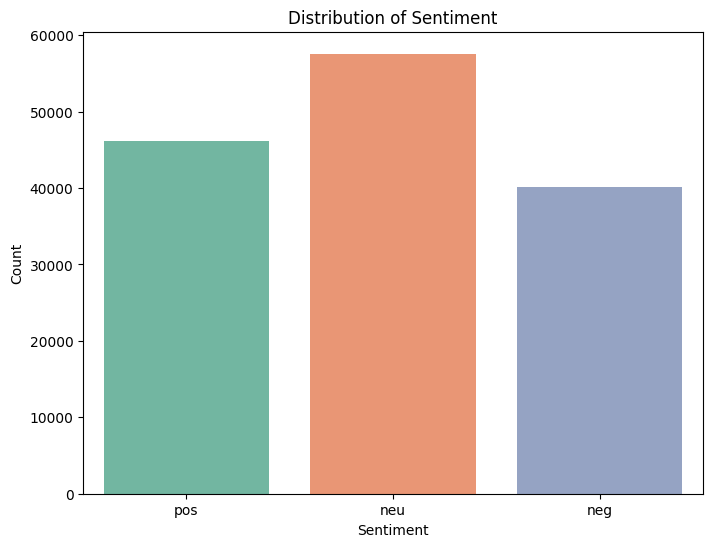

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

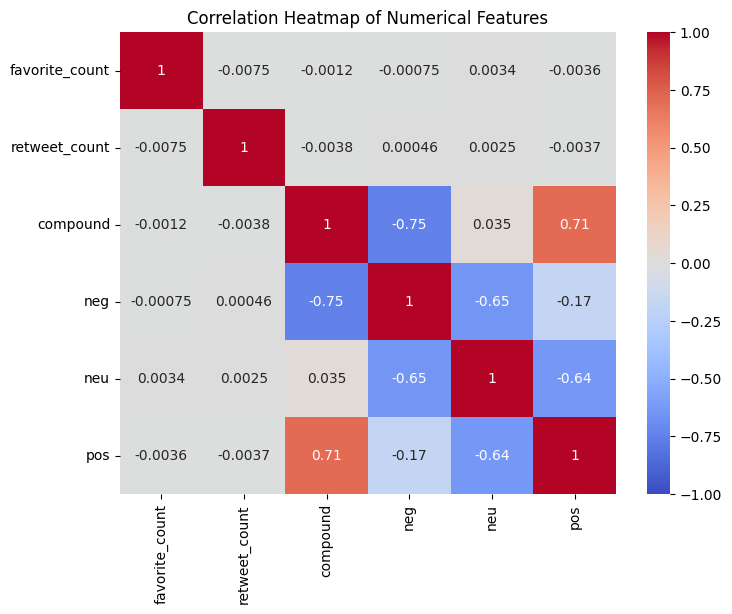

In [41]:
# Select only numerical columns for correlation
numerical_data = df[['favorite_count', 'retweet_count', 'compound', 'neg', 'neu', 'pos']]

plt.figure(figsize=(8, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

<ipython-input-42-374b25c6b838>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sentiment', y='compound', palette='Set2')


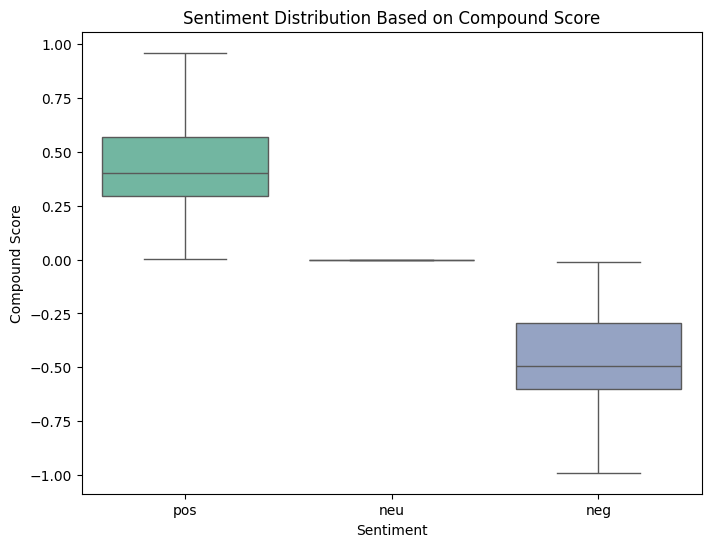

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sentiment', y='compound', palette='Set2')
plt.title('Sentiment Distribution Based on Compound Score')
plt.xlabel('Sentiment')
plt.ylabel('Compound Score')
plt.show()

### Cleaning Data

In [62]:
df[['original_text', 'clean_tweet']].sample(5)

,original_text,clean_tweet
45215,RT @PTI_News: BSF jawan attached with Centre's...,bsf jawan attach centr west bengal imct test p...
1481,RT @jeffphilips1: Nigeria is a terrible countr...,nigeria terribl countri govern redeem man corr...
3038,You might be worried about coronavirus (COVID-...,might worri coronaviru covid19 could affect li...
38067,RT @EnglishmanAdam: A friend died yesterday. \...,friend die yesterday paramed whose job save li...
96405,RT @iamflexyp16: You people still fight over w...,peopl still fight woman ippi madagascar covid1...


In [63]:
import re

# Function to extract hashtags (without '#')
def extract_hashtags(text):
    return re.findall(r"#(\w+)", str(text).lower())

# Apply to your DataFrame
df['hashtags_only'] = df['original_text'].apply(extract_hashtags)

# Check sample output:
df[['original_text', 'hashtags_only']].sample(5)


,original_text,hashtags_only
128542,Somebody said Malawi was going to the left and...,[]
109514,RT @DelmonteKenya: Del Monte Kenya will contin...,[]
8959,SPC is giving away virtual $5 certificates to ...,[]
123901,RT @SBACommunities: @MayorJValdivia rolled out...,[]
95930,RT @parthaskar: Covid-19 and ethnicity—why are...,[]


In [64]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define the cleaning function
def clean_text_with_lemmatization(text):
    text = str(text).lower()                                           # Lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)                # Remove URLs
    text = re.sub(r'\@\w+', '', text)                                  # Remove mentions
    text = re.sub(r'#', '', text)                                      # Remove '#' but keep the word
    text = re.sub(r'[^a-z\s]', '', text)                               # Remove punctuation & numbers
    text = re.sub(r'\s+', ' ', text).strip()                           # Remove extra spaces
    # Remove stopwords and apply lemmatization
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(words)

# Apply the cleaning function and create a new column
df['processed_text'] = df['original_text'].apply(clean_text_with_lemmatization)

# ✅ Check a few cleaned examples:
df[['original_text', 'processed_text']].sample(5)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,original_text,processed_text
105294,RT @rohini_sgh: How come anchors who have spen...,rt come anchor spent time communalising covid ...
19492,RT @caulmick: There have been approximately te...,rt approximately ten death disability home dis...
122139,"@Lesufi @Steve_Mabona my ""Leaders"" If the upco...",leader upcoming brigade funded couldnt funded ...
26737,RT @BostonJoan: I am going off the rails in th...,rt going rail interview counterspeech protect ...
126062,RT @GrahamGrumps: #COVID__19 advice:\n\nInfect...,rt covid advice infection high r number high d...


In [65]:
# Check a few cleaned examples:
df[['original_text', 'processed_text', 'hashtags_only']].sample(5)

,original_text,processed_text,hashtags_only
13194,⭐10% OFFER EXTENDED⭐\n\n4 days left to get 5% ...,offer extended day left get well donate covid ...,[homelesstaskforce]
122711,RT @Romano5149: Oh I see “the world” is respon...,rt oh see world responsible blame trump slow r...,[]
13138,RT @myopiclenses: 11 cases of COVID-19 in Kera...,rt case covid kerala today four recovered rema...,[]
76271,"Let’s remember that 12,500 Americans died from...",let remember american died hn counting died co...,[]
13306,Wuhan's L-strain may be behind Gujarat's high ...,wuhan lstrain may behind gujarat high death ra...,[]


In [66]:
# Save the dataframe
df.to_csv('covid_twitter_cleaned.csv', index=False)

# Load back to confirm:
df_new = pd.read_csv('covid_twitter_cleaned.csv')
df_new.head(15)


,id,created_at,source,original_text,lang,favorite_count,retweet_count,original_author,hashtags,user_mentions,...,compound,neg,neu,pos,sentiment,tweet_length,hashtags_extracted,date,processed_text,hashtags_only
0,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/android"" ...",RT @GlblCtzn: .@priyankachopra is calling on l...,en,0.0,31.0,RJIshak,NaN,"GlblCtzn, priyankachopra",...,0.8176,0.000,0.452,0.548,pos,21,[],2020-04-19,rt calling leader help protect refugee covid p...,[]
1,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/android"" ...",RT @OGSG_Official: OGUN STATE SUPPORT FOR CBN-...,en,0.0,61.0,makinwaoluwole,NaN,OGSG_Official,...,0.6486,0.000,0.602,0.398,pos,14,[],2020-04-19,rt ogun state support cbnnirsal covid targeted...,[]
2,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/iphone"" r...",RT @AdvoBarryRoux: These 5 police officials ba...,en,0.0,1.0,TembeAmu,NaN,AdvoBarryRoux,...,0.2732,0.000,0.851,0.149,pos,22,[],2020-04-19,rt police official based namahadi police stati...,[]
3,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/iphone"" r...",RT @MobilePunch: COVID-19: Oyo discharges two ...,en,0.0,0.0,ilyasrabiu,NaN,MobilePunch,...,0.0000,0.000,1.000,0.000,neu,8,[],2020-04-19,rt covid oyo discharge two patient,[]
4,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/android"" ...",My Condolences to the Family of those who did ...,en,0.0,13869.0,bucketeconomist,Covid_19,NaN,...,0.0000,0.000,1.000,0.000,neu,12,['covid'],2020-04-19,condolence family survive covid,['covid_19']
5,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/iphone"" r...",RT @DrJMZimmerman: I received this text from m...,en,0.0,526.0,rohaniroop,NaN,DrJMZimmerman,...,0.0000,0.000,1.000,0.000,neu,25,[],2020-04-19,rt received text year old son working covid pa...,[]
6,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/iphone"" r...",Taiwan's Vice-President Chen Chien-jen on his ...,en,0.0,119.0,agostinhozinga,NaN,NaN,...,-0.3818,0.245,0.755,0.000,neg,11,[],2020-04-19,taiwan vicepresident chen chienjen country fig...,[]
7,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/iphone"" r...",RT @morethanmySLE: BREAKING: A New York woman ...,en,0.0,474.0,DrJeffreyPOlson,coronavirus,morethanmySLE,...,-0.5994,0.262,0.738,0.000,neg,22,['covid'],2020-04-19,rt breaking new york woman coronavirus symptom...,['coronavirus']
8,1.250000e+18,2020-04-19,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Horrible tragedy in Nova Scotia today. How wil...,en,0.0,23.0,MichelleCarbert,NaN,NaN,...,0.0000,0.000,1.000,0.000,neu,20,[],2020-04-19,horrible tragedy nova scotia today family get ...,[]
9,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/android"" ...",@TahirsyeedK @sagarikaghose Covid-19 can be cu...,en,0.0,6.0,Deshbha21624810,NaN,"TahirsyeedK, sagarikaghose",...,0.0000,0.000,1.000,0.000,neu,16,[],2020-04-19,covid cured sooner laterbut cure ghose virus,[]
